## Checking for missing values

In [48]:
import pandas as pd
# Read the final dataset
df = pd.read_csv("../data/final_data_2000_2021.csv")
df.head()

,Country Name,Year,Mortality rate under-5,Population living in slums percentage,GDP per capita,"Secondary education, pupils female percentage",Population density (people per sq. km of land area),DPT3 immunization,People using safely managed drinking water services percentage,Income classification,Current health expenditure percentage
0,Afghanistan,2000,131.7,NaN,1617.826475,NaN,30.863847,24.0,11.093326,Low-income countries,NaN
1,Afghanistan,2001,127.4,NaN,1454.110782,0.00000,31.099929,33.0,11.105221,Low-income countries,NaN
2,Afghanistan,2002,123.1,NaN,1774.308743,NaN,32.776961,36.0,12.007733,Low-income countries,9.443391
3,Afghanistan,2003,118.7,NaN,1815.928200,24.44685,34.854344,41.0,12.909922,Low-income countries,8.941258
4,Afghanistan,2004,114.2,NaN,1776.918207,16.27781,36.123230,50.0,13.818684,Low-income countries,9.808474


In [49]:
print(df['Country Name'].unique())

['Afghanistan' 'Africa Eastern and Southern' 'Africa Western and Central'
 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Arab World' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Virgin Islands' 'Brunei' 'Brunei Darussalam' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Caribbean small states' 'Cayman Islands'
 'Central African Republic' 'Central Europe and the Baltics' 'Chad'
 'Channel Islands' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao'
 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Early-demographic dividend'
 'East Asia & Pacific' 'East Asia & Pacific (IDA & IBRD countries

In [50]:
countries_to_drop = [ 'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Caribbean small states',
                     'Central Europe and the Baltics', 'Early-demographic dividend', 'East Asia & Pacific', 'Euro area', 'Europe & Central Asia', 
                     'Early-demographic dividend', 'East Asia & Pacific (IDA & IBRD countries)','East Asia & Pacific (excluding high income)',
                     'Europe & Central Asia (IDA & IBRD countries)', 
                     'Europe & Central Asia (excluding high income)', 'European Union', 'Fragile and conflict affected situations',
                     'Heavily indebted poor countries (HIPC)', 'High income', 'IDA blend', 'IDA only', 'IDA total', 
                     'IBRD only','IDA & IBRD total',
                     'Late-demographic dividend', 'Latin America & Caribbean', 'Latin America & Caribbean (excluding high income)',
                     'Latin America & the Caribbean (IDA & IBRD countries)', 'Least developed countries: UN classification',
                     'Low & middle income', 'Low income', 'Lower middle income', 'Middle East, North Africa, Afghanistan & Pakistan',
                     'Middle East, North Africa, Afghanistan & Pakistan (IDA & IBRD)',
                     'Middle East, North Africa, Afghanistan & Pakistan (excluding high income)', 'Middle income', 'North America', 'OECD members',
                     'Other small states', 'Pacific island small states',  'Post-demographic dividend', 'Pre-demographic dividend',
                     'Small states', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa', 'Sub-Saharan Africa (IDA & IBRD countries)',
                     'Sub-Saharan Africa (excluding high income)', 'Upper middle income', 'World']

df = df[~df['Country Name'].isin(countries_to_drop)]

In [51]:
print(df["Country Name"].unique())

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Channel Islands' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'French Southern Territories' 'Gabon' 'Ga

In [52]:
# Performing missing value checks for the other columns
missing_data_cleaned = df.isnull().mean()
print("Missing data percentages after dropping high-missing columns:")
print(missing_data_cleaned[missing_data_cleaned > 0])

Missing data percentages after dropping high-missing columns:
Mortality rate under-5                                            0.142801
Population living in slums percentage                             0.636867
GDP per capita                                                    0.140229
Secondary education, pupils female percentage                     0.462421
Population density (people per sq. km of land area)               0.069422
DPT3 immunization                                                 0.159612
People using safely managed drinking water services percentage    0.407634
Income classification                                             0.062104
Current health expenditure percentage                             0.175435
dtype: float64


In [53]:
# Since population in slums has over 50% missing values, we will drop this column
df_cleaned = df.drop(columns=['Population living in slums percentage'])
print("Dropped Population living in slums percentage column due to high missing values.")

Dropped Population living in slums percentage column due to high missing values.


In [54]:
# Identify countries that have over 40% missing values
country_missing_data = df_cleaned.groupby('Country Name').apply(lambda x: x.isnull().mean())
countries_to_drop = country_missing_data[country_missing_data > 0.4].dropna(how='all').index.tolist()
print(f"Countries to drop (>{40}% missing): {countries_to_drop}")
print(f"Number of countries to drop: {len(countries_to_drop)}")
# Drop these countries from the dataframe
df_cleaned = df_cleaned[~df_cleaned['Country Name'].isin(countries_to_drop)]

Countries to drop (>40% missing): ['Algeria', 'American Samoa', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Azerbaijan', 'Bahamas, The', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'British Virgin Islands', 'Brunei', 'Brunei Darussalam', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Channel Islands', 'China', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Democratic Republic of Congo', 'Djibouti', 'Dominica', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Faroe Islands', 'Fiji', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia, The', 'Gibraltar', 'Greenland', 'Guam', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR, China', 'India', 'Iraq', 'Isle of Man', 'Jamaica', 'Japan', 'K

/var/folders/yk/c0cfqj715njfdnphhzw8m5p00000gn/T/ipykernel_12941/2073042414.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  country_missing_data = df_cleaned.groupby('Country Name').apply(lambda x: x.isnull().mean())


In [55]:
len(df_cleaned)

1760

In [56]:
print(df_cleaned["Country Name"].unique())

['Afghanistan' 'Albania' 'Andorra' 'Austria' 'Bahrain' 'Bangladesh'
 'Belgium' 'Bhutan' 'Brazil' 'Bulgaria' 'Canada' 'Chad' 'Chile' 'Colombia'
 'Costa Rica' 'Cyprus' 'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador'
 'Estonia' 'Ethiopia' 'Finland' 'France' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Hungary' 'Iceland' 'Indonesia'
 'Iran, Islamic Rep.' 'Ireland' 'Israel' 'Italy' 'Jordan' 'Korea, Rep.'
 'Kuwait' 'Lao PDR' 'Latvia' 'Lebanon' 'Lesotho' 'Lithuania' 'Luxembourg'
 'Malawi' 'Malaysia' 'Malta' 'Mexico' 'Moldova' 'Morocco' 'Myanmar'
 'Nepal' 'Netherlands' 'New Zealand' 'Nigeria' 'North Macedonia' 'Norway'
 'Oman' 'Paraguay' 'Peru' 'Poland' 'Portugal' 'Qatar' 'Romania'
 'Russian Federation' 'Samoa' 'Sao Tome and Principe' 'Senegal' 'Serbia'
 'Slovak Republic' 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Tajikistan'
 'Ukraine' 'United Kingdom' 'Uzbekistan']


In [57]:
len(df_cleaned['Country Name'].unique())

80

In [58]:
# revisit missing values for the cleaned dataframe
missing_data_final = df_cleaned.isnull().mean()
print("Missing data percentages after cleaning:")
print(missing_data_final[missing_data_final > 0].sort_values(ascending=False))


Missing data percentages after cleaning:
Secondary education, pupils female percentage                     0.223864
People using safely managed drinking water services percentage    0.006250
Population density (people per sq. km of land area)               0.003409
Income classification                                             0.003409
Current health expenditure percentage                             0.001136
dtype: float64


## Missing Data Imputation

Given that the missing data percentages are reasonable, we're looking to impute
- Time series imputation (linear interpolation) for the missing data in "Secondary education, pupils (% female)" with median at the country level.
- Time series imputation (linear interpolation) for missing data in population density: Since population density is a continuous time-series variable, interpolation is best to assume a gradual change between observed years.
- For the percentage-based indicators, the median is safer than the mean as it minimizes the influence of extreme yearly values within a single country so we're using median imputation for "People using safely managed drinking water services percentage" and "Current health expenditure percentage"


In [59]:
# Apply linear interpolation within each country's time series using .transform()
df_cleaned["Secondary education, pupils female percentage"] = (
    df_cleaned.groupby('Country Name')["Secondary education, pupils female percentage"]
    .transform(lambda x: x.interpolate(method='linear'))
)

In [60]:
# Use linear interpolation, grouped by Country Name, to fill missing years
df_cleaned["Population density (people per sq. km of land area)"] = (
    df_cleaned.groupby('Country Name')["Population density (people per sq. km of land area)"]
    .transform(lambda x: x.interpolate(method='linear'))
)

In [61]:
percentage_cols = [
    'People using safely managed drinking water services percentage',
    'Current health expenditure percentage'
]

for col in percentage_cols:
    # Use median imputation, grouped by Country Name
    df_cleaned[col] = (
        df_cleaned.groupby('Country Name')[col]
        .transform(lambda x: x.fillna(x.median()))
    )

In [62]:
percentage_cols = [
    'Income classification'
]

for col in percentage_cols:
    # Use mode imputation, grouped by Country Name
    df_cleaned[col] = (
        df_cleaned.groupby('Country Name')[col]
        .transform(lambda x: x.fillna(x.mode().iloc[0]))
    )

## Revisit missing data

In [63]:
print(df_cleaned.isnull().mean())
df_cleaned.head()

Country Name                                                      0.000000
Year                                                              0.000000
Mortality rate under-5                                            0.000000
GDP per capita                                                    0.000000
Secondary education, pupils female percentage                     0.007386
Population density (people per sq. km of land area)               0.003409
DPT3 immunization                                                 0.000000
People using safely managed drinking water services percentage    0.000000
Income classification                                             0.000000
Current health expenditure percentage                             0.000000
dtype: float64


,Country Name,Year,Mortality rate under-5,GDP per capita,"Secondary education, pupils female percentage",Population density (people per sq. km of land area),DPT3 immunization,People using safely managed drinking water services percentage,Income classification,Current health expenditure percentage
0,Afghanistan,2000,131.7,1617.826475,NaN,30.863847,24.0,11.093326,Low-income countries,9.926482
1,Afghanistan,2001,127.4,1454.110782,0.000000,31.099929,33.0,11.105221,Low-income countries,9.926482
2,Afghanistan,2002,123.1,1774.308743,12.223425,32.776961,36.0,12.007733,Low-income countries,9.443391
3,Afghanistan,2003,118.7,1815.928200,24.446850,34.854344,41.0,12.909922,Low-income countries,8.941258
4,Afghanistan,2004,114.2,1776.918207,16.277810,36.123230,50.0,13.818684,Low-income countries,9.808474


In [64]:
# Imputing missing values for Secondary education, pupils female percentage using LOCF and NOCB

column = 'Secondary education, pupils female percentage'

# 1. Fill forward (LOCF): Fills gaps using the previous year's value for the country.
df_cleaned[column] = df_cleaned.groupby('Country Name')[column].ffill()

# 2. Fill backward (NOCB): Fills remaining gaps (usually leading NaNs) using the next year's value.
df_cleaned[column] = df_cleaned.groupby('Country Name')[column].bfill()

In [65]:
# Imputing missing values for Population density (people per sq. km of land area) using mean of the country
column = 'Population density (people per sq. km of land area)'

# Impute missing values using the mean of the column, grouped by Country Name.
df_cleaned[column] = (
    df_cleaned.groupby('Country Name')[column]
    .transform(lambda x: x.fillna(x.mean()))
)

In [66]:
# count number of rows with any missing values after dropping
df_cleaned.isnull().any(axis=1).sum()

np.int64(0)

In [67]:
# Create a new DataFrame with all rows that do not have any missing values
# .dropna(how='any') removes a row if *any* value in that row is NaN
df_final = df_cleaned.dropna(how='any', axis=0).copy()

print(f"Original row count: {len(df_cleaned)}")
print(f"Final complete row count: {len(df_final)}")
print(f"Number of rows dropped: {len(df_cleaned) - len(df_final)}")

Original row count: 1760
Final complete row count: 1760
Number of rows dropped: 0


## Check distribution of all attributes

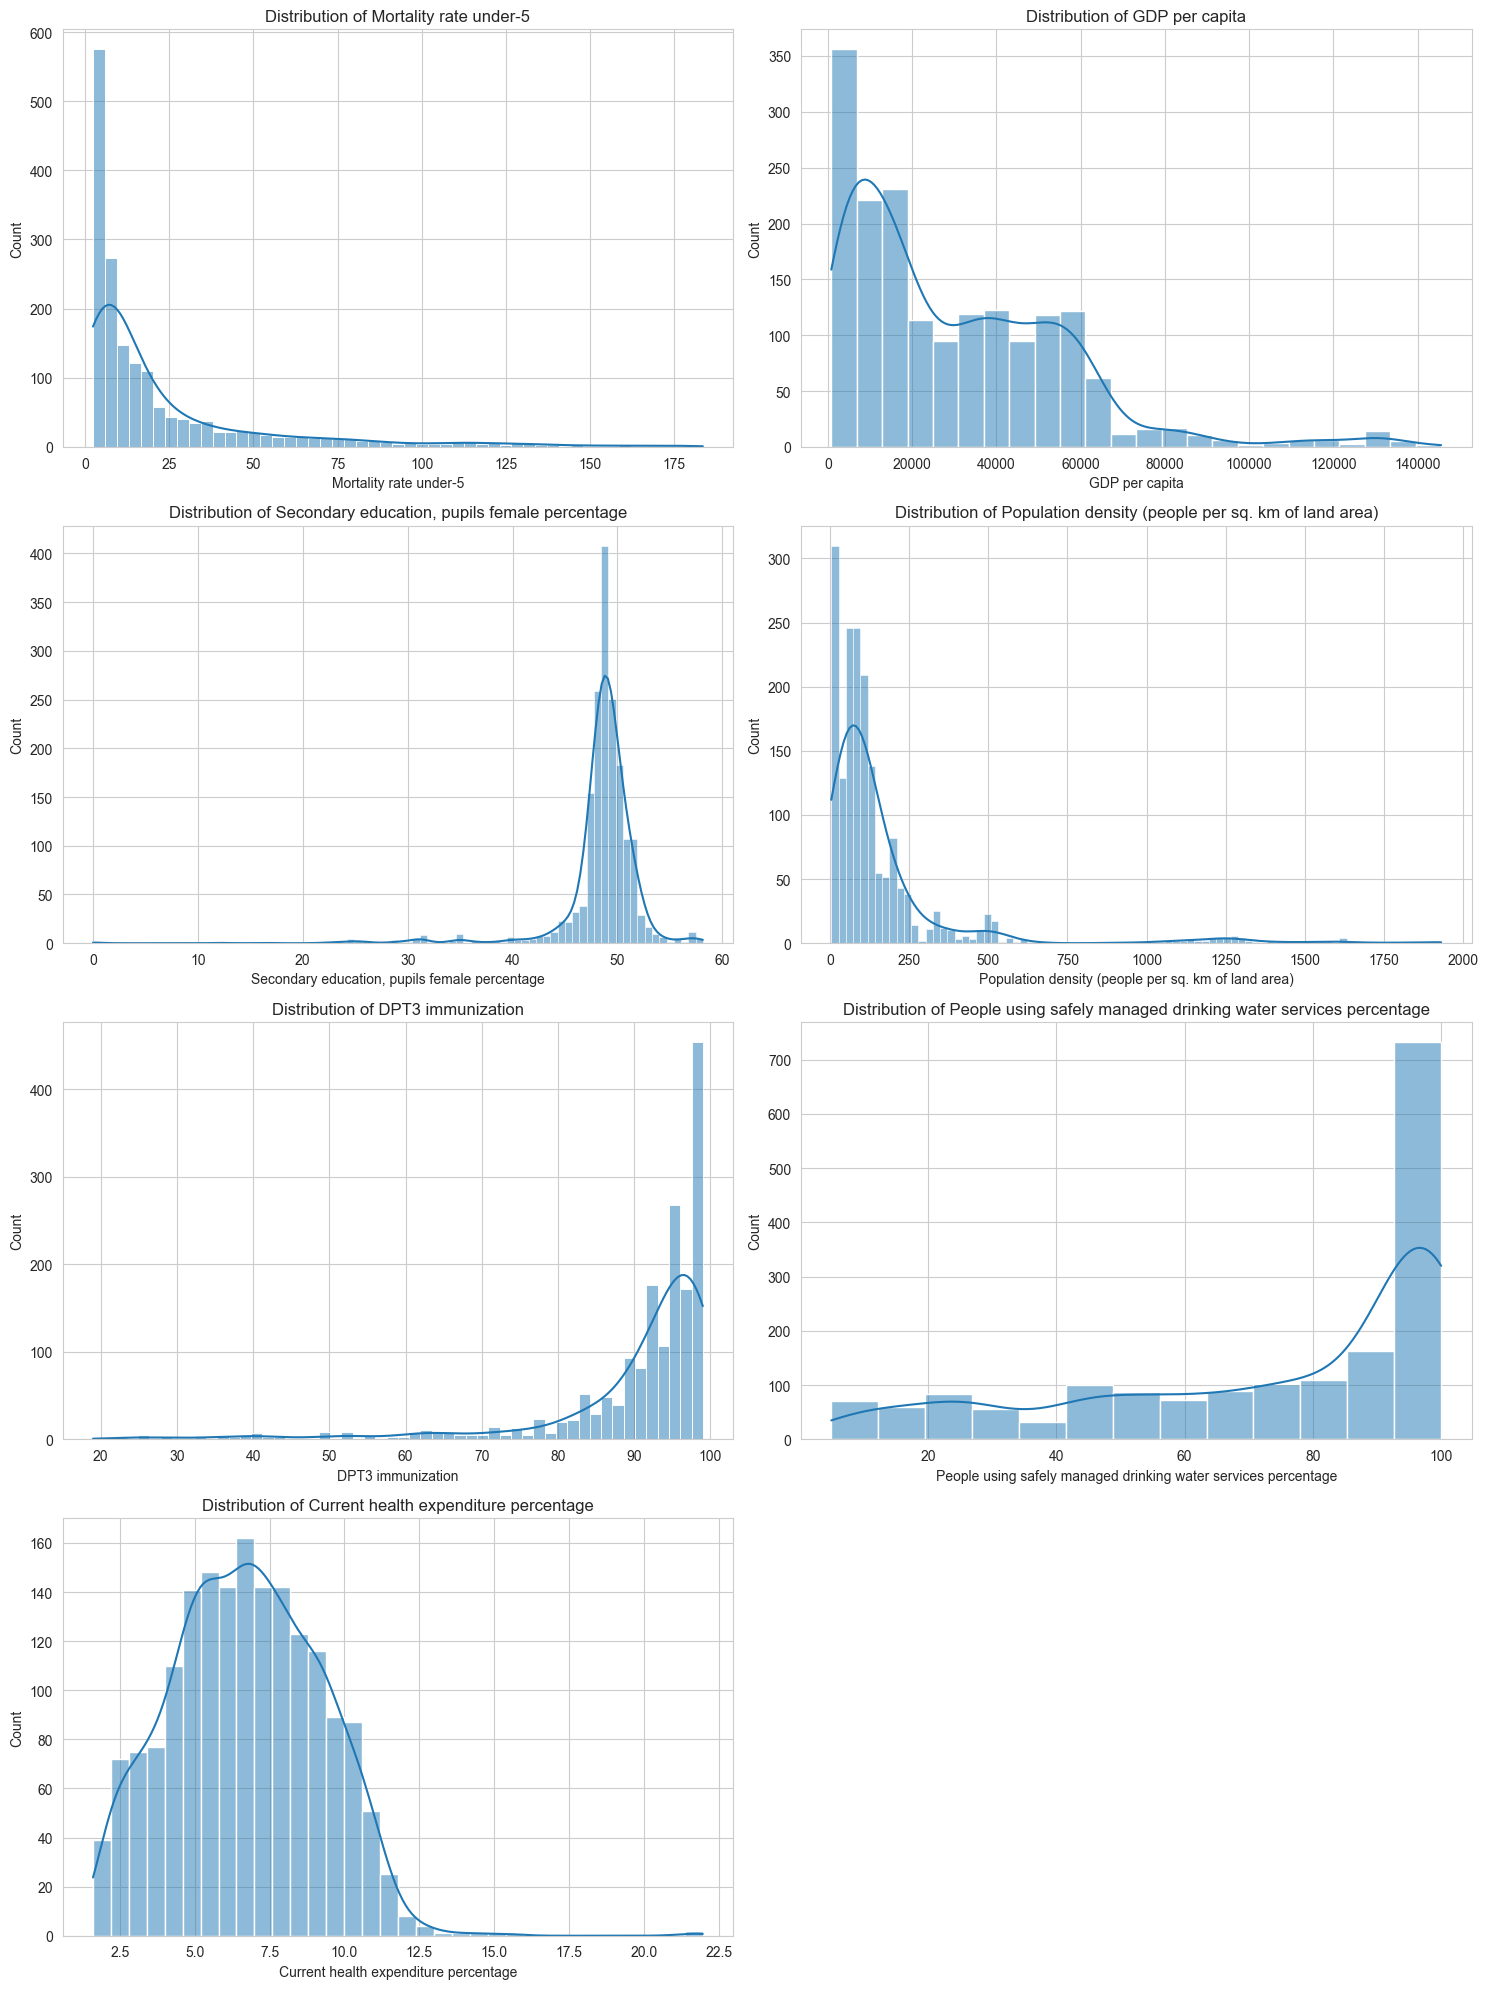

In [68]:
# check distribution of all attributes except Country Name and Year
# plot histograms for all columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
num_cols = df_final.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Year')  # Exclude Year from the plots
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)  # 2 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_final[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


As indicated in the plots above, the following attributes are extremely right skewed:
1. GDP per capita
2. Population density
3. Child mortality rate

Using log transformation for these aforementioned attributes using `log(1+x)` (or np.log1p) because many density values are close to zero, `log(0)` is undefined.

Current health expenditure percentage has a mild positive right skew, square root transformation is often ideal for mild positive skew as it's gentler than the log and can stabilize variance.

People using safely managed drinking water services percentage is bimodal, a logit transformation would be appropriate to use

Secondary education, pupils female percentage is heavily left skewed but it has a bell shaped curve so using the reflect-and-transform technique: recentering it and doing a log transformation could suffice.

For DPT3 immunization percentage, just like secondary education, we use reflect-and-transform technique as well

In [69]:
import numpy as np
import pandas as pd

# --- 1. Transformations for POSITIVE (Right) Skew (Using log(1+x) for uniformity) ---

# These variables are heavily skewed to the right (concentrated at low values).
# log(1+x) is used for uniformity and robustness against zero/near-zero values.
print("Applying log(1+x) to positively skewed variables...")

positive_skew_cols = {
    'GDP per capita': 'log_gdp_per_capita',
    'Population density (people per sq. km of land area)': 'log_population_density',
    'Mortality rate under-5': 'log_mortality_rate_under_5'
}

for col, new_col_name in positive_skew_cols.items():
    df_cleaned[new_col_name] = np.log1p(df_cleaned[col])

# Drop original positively skewed columns
#df_cleaned = df_cleaned.drop(columns=[col for col, _ in positive_skew_cols.items()])


# --- 2. Transformation for NEGATIVE (Left) Skew (Secondary Education) ---

# This distribution is clustered at high values. We use Reflection + Log.
sec_edu_col = 'Secondary education, pupils female percentage'
val = df_cleaned[sec_edu_col].max()

reflection_constant = val + 1 # as log(0) is undefined

print("Applying Reflection and Log to negatively skewed Secondary Education...")
df_cleaned['log_reflected_secondary_education'] = np.log1p(reflection_constant - df_cleaned[sec_edu_col])

# Drop original negatively skewed column
df_cleaned = df_cleaned.drop(columns=[sec_edu_col])

dpt3_col = 'DPT3 immunization'
val = df_cleaned[dpt3_col].max()

reflection_constant = val + 1 # as log(0) is undefined
df_cleaned['log_reflected_dpt3_immunization'] = np.log1p(reflection_constant - df_cleaned[dpt3_col])

# Drop original negatively skewed column
df_cleaned = df_cleaned.drop(columns=[dpt3_col])

# --- 3. Transformation for BOUNDED RATIO (Water Services) ---

# This percentage data is bounded (0-100) and bimodal/left-skewed. Logit is the best fit.
# Logit formula: log(p / (1-p)), where p is the proportion (value/100).
print("Applying Logit transformation to Water Services percentage...")

water_col = 'People using safely managed drinking water services percentage'

# Convert percentage to proportion (0 to 1)
proportion = df_cleaned[water_col] / 100

# Handle edge cases (p=0 or p=1) by clipping, as logit is undefined at the boundaries.
# Clipping to a small epsilon prevents log(0) or log(inf).
epsilon = 1e-4 # A small positive value (0.0001)
proportion_adj = np.clip(proportion, epsilon, 1 - epsilon)

# Apply the Logit transformation
df_cleaned['logit_water_services'] = np.log(proportion_adj / (1 - proportion_adj))

# Drop the original water services column
df_cleaned = df_cleaned.drop(columns=[water_col])

# --- 4. Transformation for MILD POSITIVE SKEW (Health Expenditure) ---

# This is a mild positive skew, making the Square Root transformation appropriate.
print("Applying Square Root transformation to Health Expenditure...")

health_col = 'Current health expenditure percentage'
df_cleaned['sqrt_health_expenditure'] = np.sqrt(df_cleaned[health_col])

# Drop the original health expenditure column
df_cleaned = df_cleaned.drop(columns=[health_col])

print("\nAll transformations complete. The new transformed features have been added as columns.")

Applying log(1+x) to positively skewed variables...
Applying Reflection and Log to negatively skewed Secondary Education...
Applying Logit transformation to Water Services percentage...
Applying Square Root transformation to Health Expenditure...

All transformations complete. The new transformed features have been added as columns.


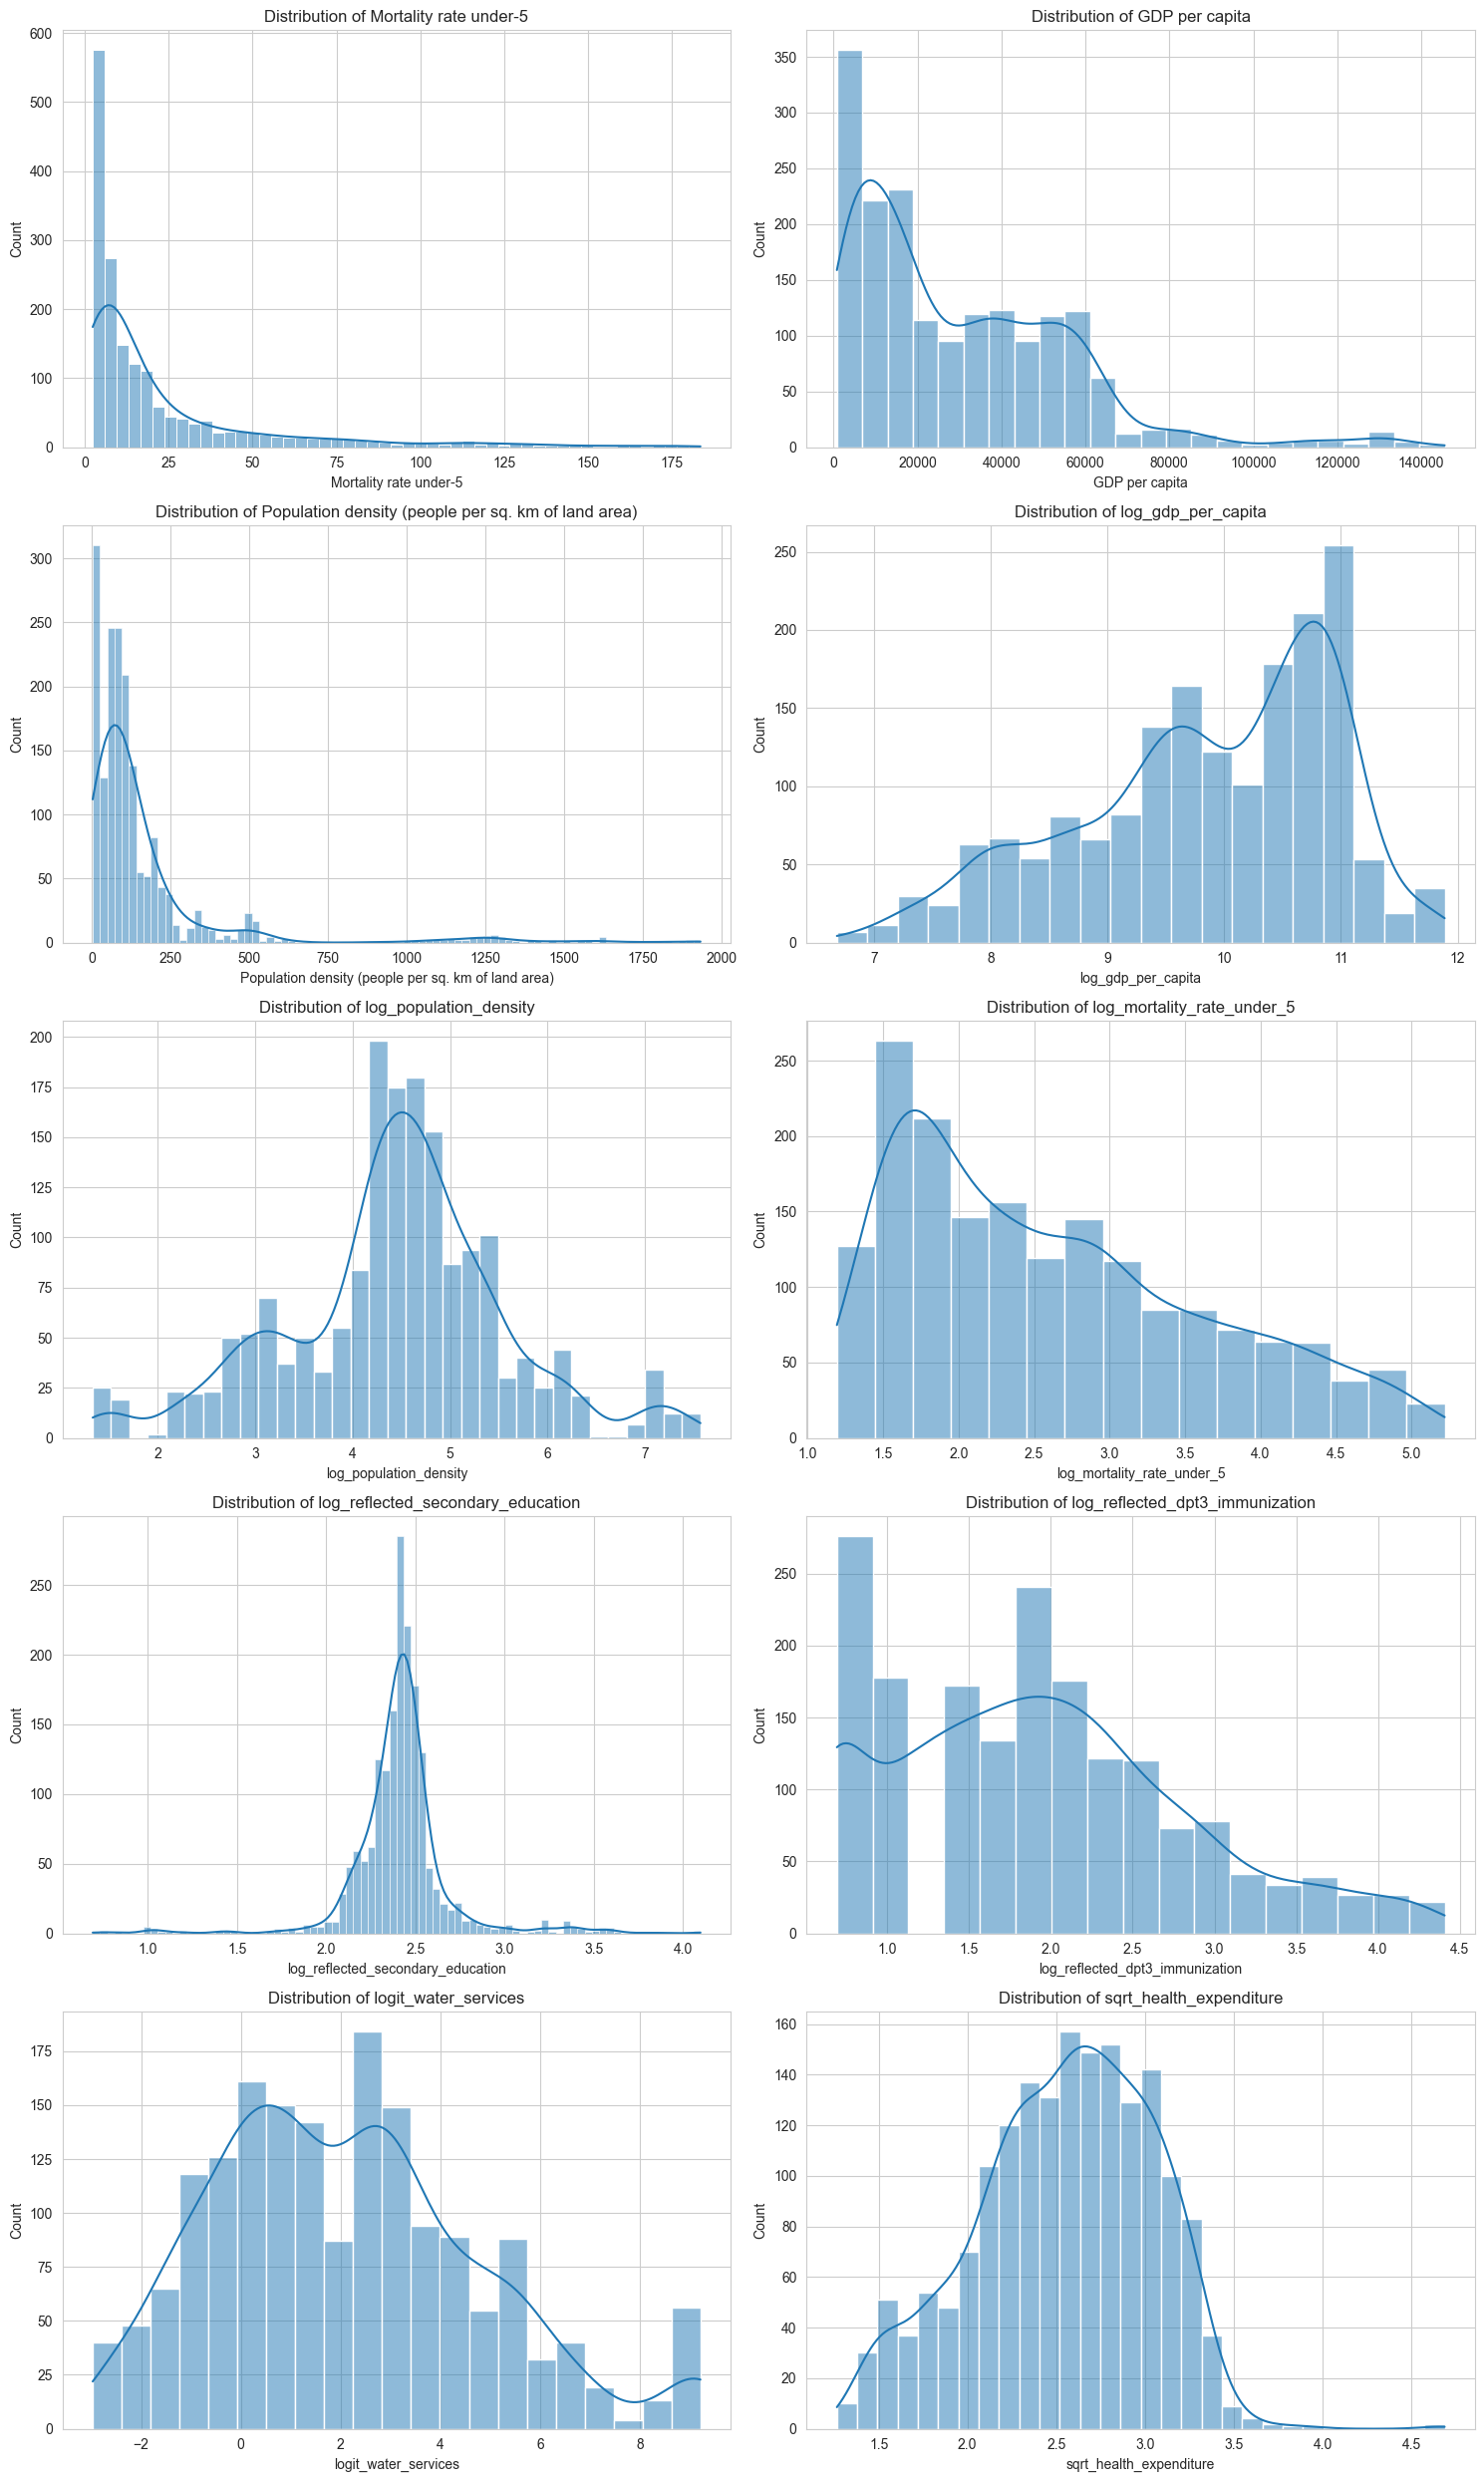

In [70]:
# check distribution of all attributes except Country Name and Year
# plot histograms for all columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('Year')  # Exclude Year from the plots
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)  # 2 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [71]:
# Since our response variable is still somewhat right-skewed, using Box-Cox transformation

from scipy.stats import boxcox
import pandas as pd

# Apply the Box-Cox transformation
transformed_data, lambda_value = boxcox(df_cleaned['log_mortality_rate_under_5'])
df_cleaned['boxcox_mortality'] = transformed_data
print(f"Box-Cox transformation applied to Mortality Rate with λ = {lambda_value:.4f}")

# Drop the original response variable column as it is no longer needed
#df_cleaned = df_cleaned.drop(columns=['log_mortality_rate_under_5'])


Box-Cox transformation applied to Mortality Rate with λ = -0.1992


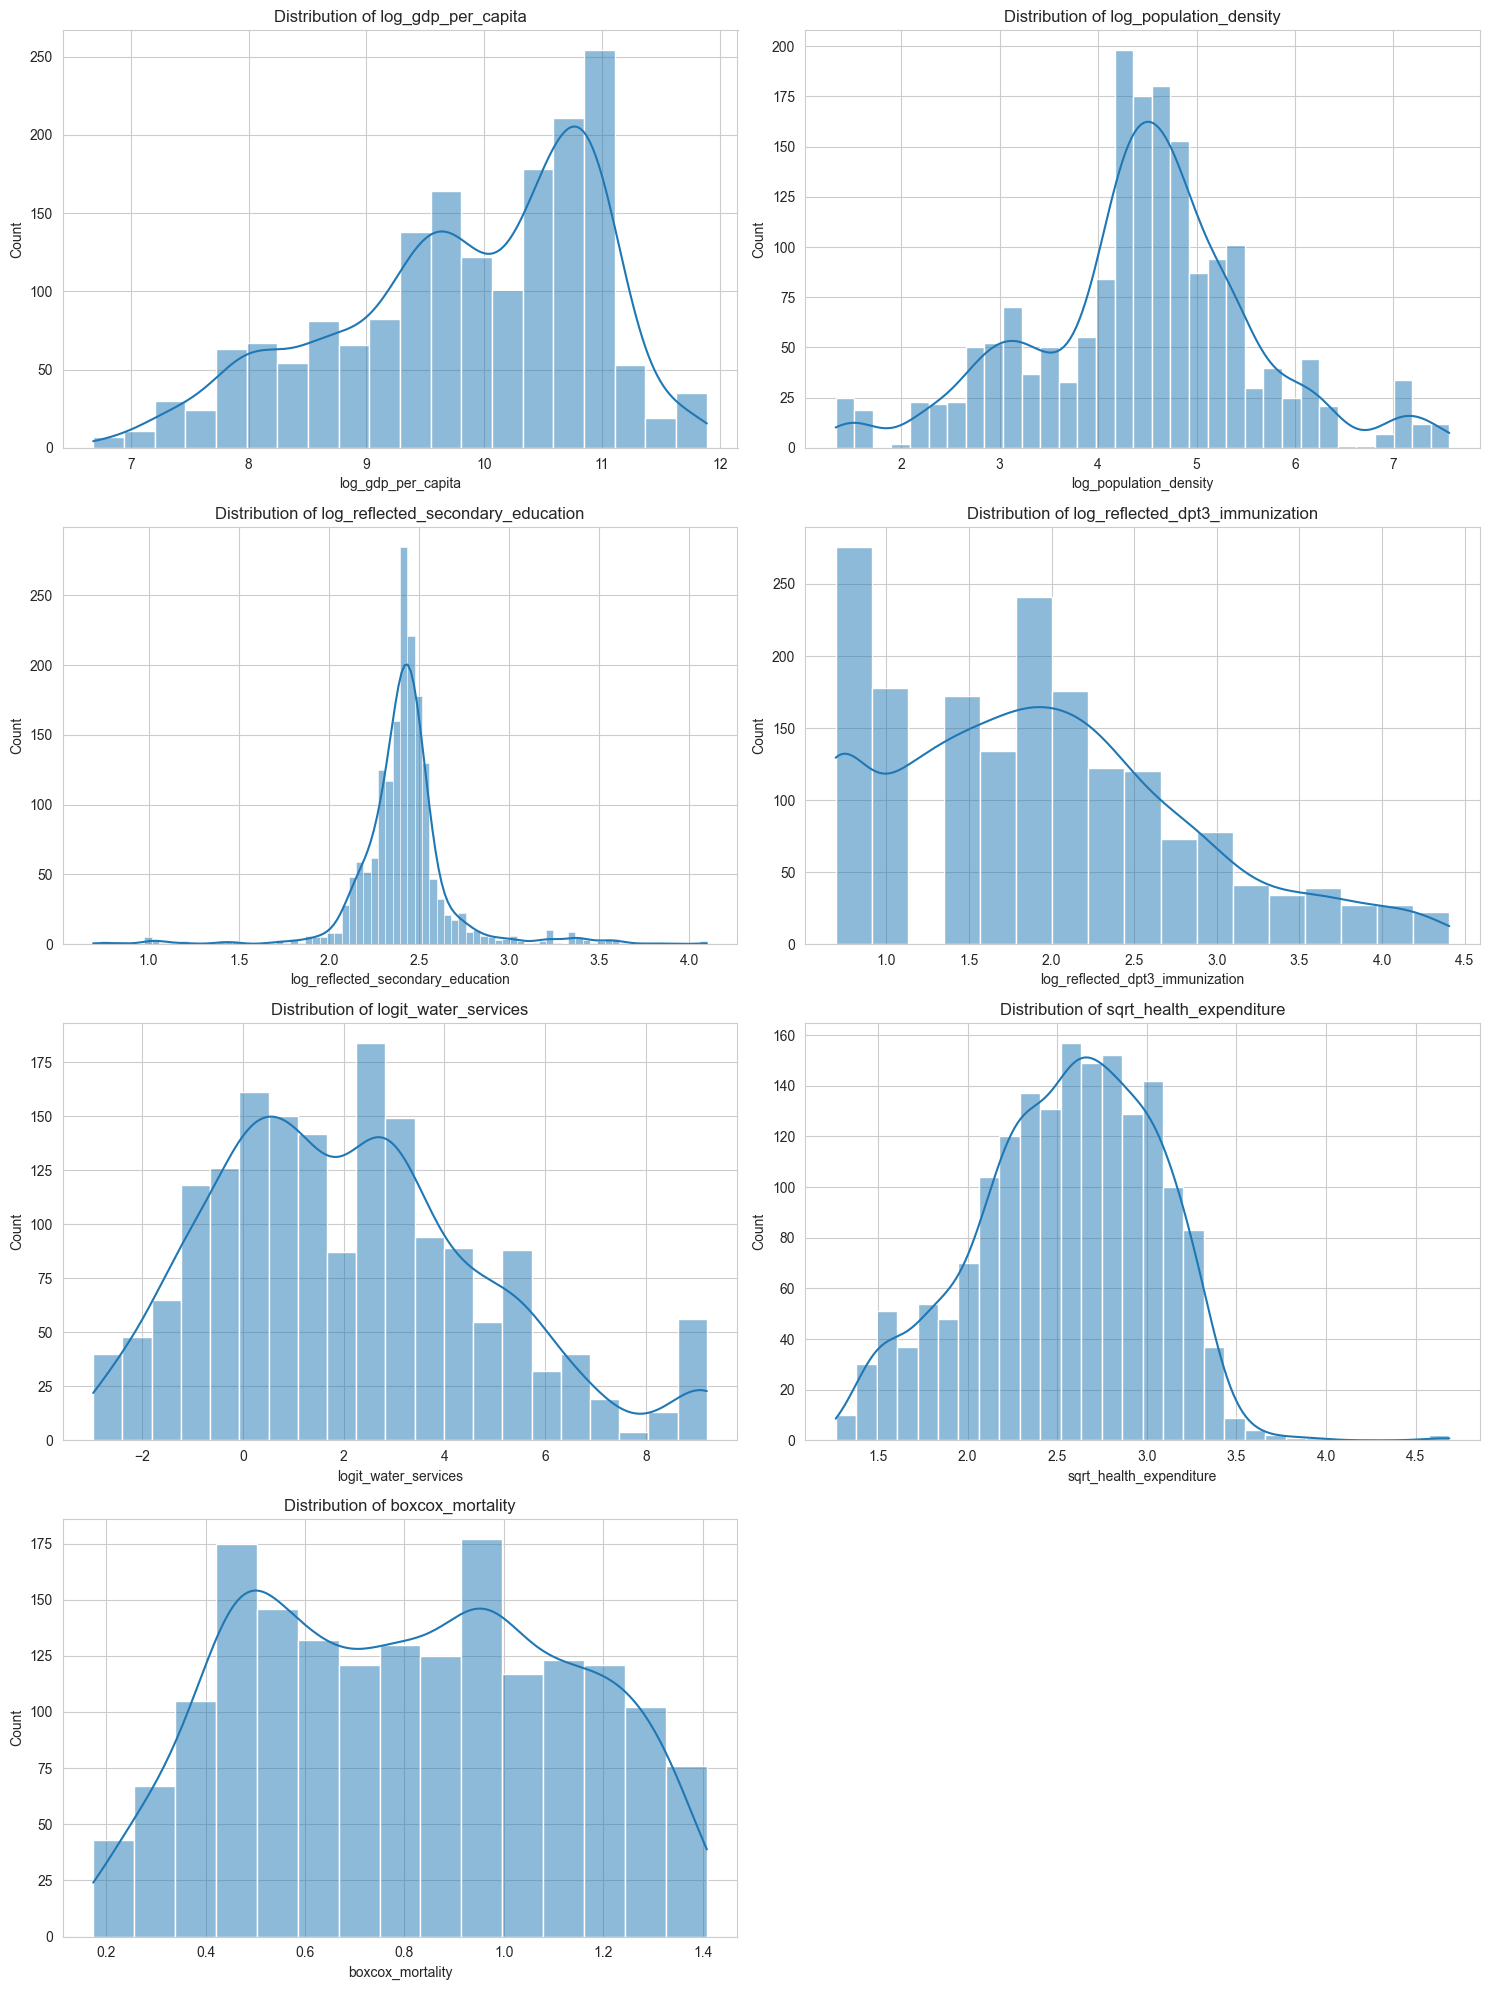

In [72]:
# check distribution of all attributes except Country Name and Year
# plot histograms for all columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
# exclude numeric columns from before transformation
num_cols.remove('Year')  # Exclude Year from the plots
num_cols.remove('log_mortality_rate_under_5')  # Exclude original mortality
num_cols.remove('Mortality rate under-5')  # Exclude original mortality
num_cols.remove('GDP per capita')  # Exclude original GDP
num_cols.remove('Population density (people per sq. km of land area)')  # Exclude original population density
num_plots = len(num_cols)
num_rows = math.ceil(num_plots / 2)  # 2 plots per row
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(df_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


## Scaling the features using StandardScaler

In [73]:
df_cleaned.columns

Index(['Country Name', 'Year', 'Mortality rate under-5', 'GDP per capita',
       'Population density (people per sq. km of land area)',
       'Income classification', 'log_gdp_per_capita', 'log_population_density',
       'log_mortality_rate_under_5', 'log_reflected_secondary_education',
       'log_reflected_dpt3_immunization', 'logit_water_services',
       'sqrt_health_expenditure', 'boxcox_mortality'],
      dtype='object')

In [74]:
from sklearn.preprocessing import StandardScaler

# List of all continuous predictors (transformed and original units)
continuous_cols = [
    'boxcox_mortality', 
    'log_gdp_per_capita', 
    'sqrt_health_expenditure', 
    'log_reflected_dpt3_immunization', 
    'log_population_density',
    'log_reflected_secondary_education',
    'logit_water_services'
]

scaler = StandardScaler()

# Fit and transform the columns
df_cleaned[continuous_cols] = scaler.fit_transform(df_cleaned[continuous_cols])

## One hot encode categorical variables

In [75]:
df_cleaned.columns

Index(['Country Name', 'Year', 'Mortality rate under-5', 'GDP per capita',
       'Population density (people per sq. km of land area)',
       'Income classification', 'log_gdp_per_capita', 'log_population_density',
       'log_mortality_rate_under_5', 'log_reflected_secondary_education',
       'log_reflected_dpt3_immunization', 'logit_water_services',
       'sqrt_health_expenditure', 'boxcox_mortality'],
      dtype='object')

In [76]:
df_cleaned['Income classification'].unique()

array(['Low-income countries', 'Lower-middle-income countries',
       'Upper-middle-income countries', 'High-income countries'],
      dtype=object)

In [77]:
# combine low and lower middle income into one category, high and upper middle into another
df_cleaned['Income classification'] = df_cleaned['Income classification'].replace({
    'Low-income countries': 'Low',
    'Lower-middle-income countries': 'Low',
    'Upper-middle-income countries': 'Low',
    'High-income countries': 'High'
})
# perform one hot encoding for Income classification
df_final = pd.get_dummies(
    df_cleaned['Income classification'],
    prefix='Income', 
    drop_first=False  # We'll drop one column manually for clarity
)
df_final.head()

,Income_High,Income_Low
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [78]:
# Setting 'Low-income countries' as the reference category by dropping it
df_final = df_final.drop(columns=['Income_Low'])

# Concatenate the dummies back to your main DataFrame
df_final = pd.concat([df_cleaned, df_final], axis=1)

#df_final.drop(columns=['Income classification'], inplace=True) # Drop this after plotting

In [79]:
df_final.head()

,Country Name,Year,Mortality rate under-5,GDP per capita,Population density (people per sq. km of land area),Income classification,log_gdp_per_capita,log_population_density,log_mortality_rate_under_5,log_reflected_secondary_education,log_reflected_dpt3_immunization,logit_water_services,sqrt_health_expenditure,boxcox_mortality,Income_High
0,Afghanistan,2000,131.7,1617.826475,30.863847,Low,-2.230818,-0.856783,4.888091,6.024520,2.683084,-1.551486,1.221384,1.758949,False
1,Afghanistan,2001,127.4,1454.110782,31.099929,Low,-2.327831,-0.850321,4.855150,6.024520,2.545223,-1.551040,1.221384,1.743294,False
2,Afghanistan,2002,123.1,1774.308743,32.776961,Low,-2.146859,-0.805740,4.821088,5.209860,2.495180,-1.518356,1.065546,1.726970,False
3,Afghanistan,2003,118.7,1815.928200,34.854344,Low,-2.125774,-0.753491,4.784989,4.153918,2.406403,-1.487741,0.899279,1.709519,False
4,Afghanistan,2004,114.2,1776.918207,36.123230,Low,-2.145523,-0.723046,4.746670,4.892872,2.226150,-1.458693,1.183673,1.690822,False


## Plots

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] # Muted, distinct colors

sns.set_style("whitegrid") # Set a cleaner background theme


/var/folders/yk/c0cfqj715njfdnphhzw8m5p00000gn/T/ipykernel_12941/883447808.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette=palette_colors)
/var/folders/yk/c0cfqj715njfdnphhzw8m5p00000gn/T/ipykernel_12941/883447808.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(x=country_counts.index, y=country_counts.values, palette=palette_colors)


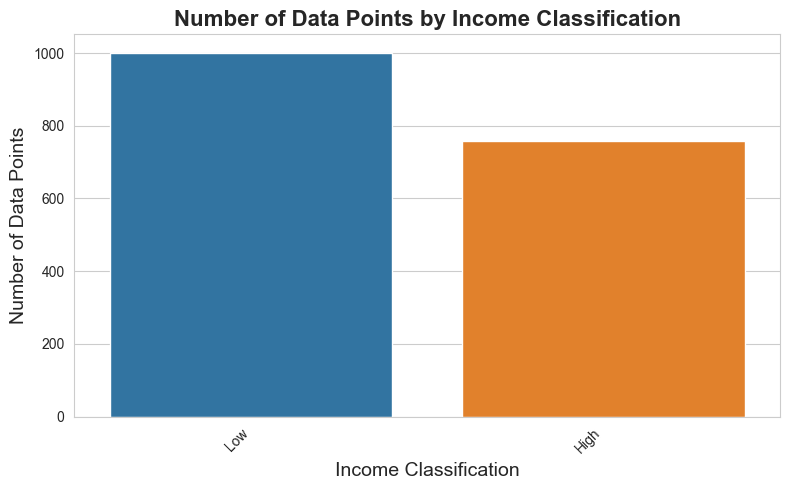

In [81]:
# Plot a histogram of income classification - use distinct country names
# shorten the tick labels for better readability to Low, Lower-Middle, Upper-Middle, High
countries = df_final['Country Name'].unique()

country_counts = df_final['Income classification'].value_counts().reindex([
    'Low', 
    'High'
])
plt.figure(figsize=(8, 5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette=palette_colors)
plt.xticks(rotation=45, ha='right')
plt.title('Number of Data Points by Income Classification', fontsize=16, fontweight='bold')
plt.xlabel('Income Classification', fontsize=14)
plt.ylabel('Number of Data Points', fontsize=14)
plt.tight_layout()
plt.show()

/var/folders/yk/c0cfqj715njfdnphhzw8m5p00000gn/T/ipykernel_12941/2149720270.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/yk/c0cfqj715njfdnphhzw8m5p00000gn/T/ipykernel_12941/2149720270.py:3: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.boxplot(


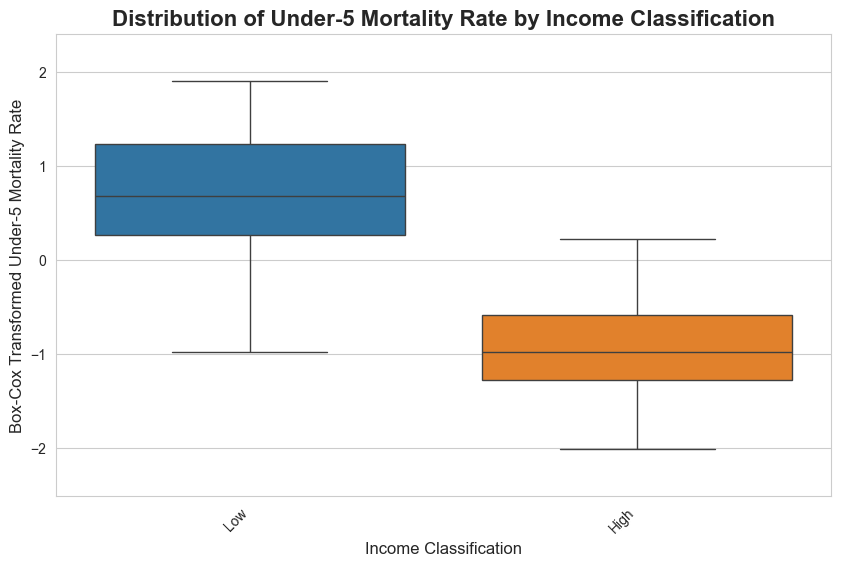

In [82]:
# plot the distribution of data by income classification
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_final,
    x='Income classification',
    y='boxcox_mortality',
    palette=palette_colors
)
plt.title('Distribution of Under-5 Mortality Rate by Income Classification', fontsize=16, fontweight='bold')
plt.xlabel('Income Classification', fontsize=12)
plt.ylabel('Box-Cox Transformed Under-5 Mortality Rate', fontsize=12)
plt.ylim(df_final['boxcox_mortality'].min() - 0.5, df_final['boxcox_mortality'].max() + 0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

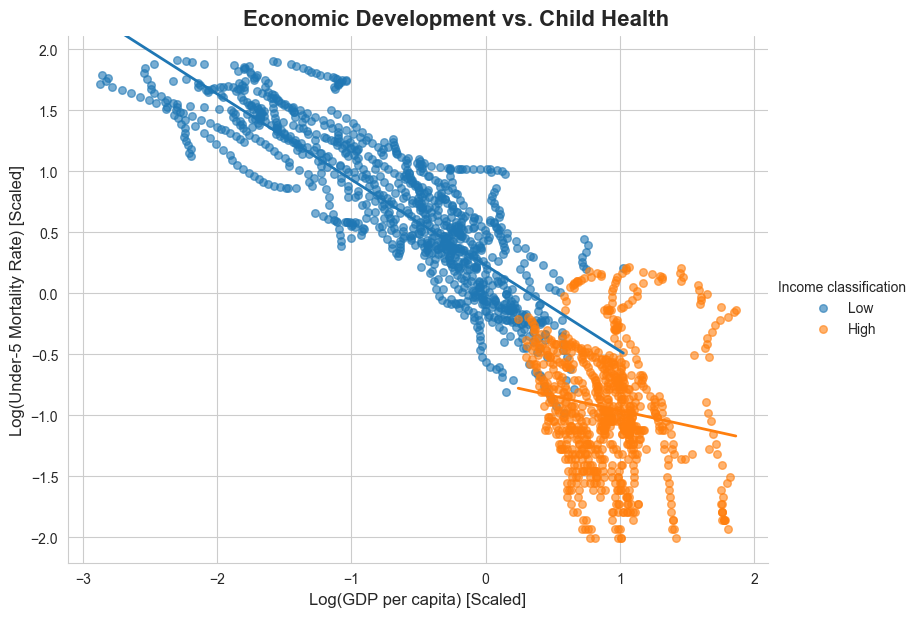

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use lmplot to draw a scatter plot with a regression line for each income group
g = sns.lmplot(
    data=df_final,
    x='log_gdp_per_capita',
    y='boxcox_mortality',
    hue='Income classification',
    palette=palette_colors,
    ci=None,
    height=6, 
    aspect=1.3, 
    scatter_kws={'alpha': 0.6, 's': 30},
    line_kws={'lw': 2}              
)

g.fig.suptitle(
    'Economic Development vs. Child Health',
    y=1.02,
    fontsize=16,
    fontweight='bold'
)
g.set_axis_labels(
    "Log(GDP per capita) [Scaled]",
    "Log(Under-5 Mortality Rate) [Scaled]",
    fontsize=12
)
g.set(ylim=(df_final['boxcox_mortality'].min() - 0.2, df_final['boxcox_mortality'].max() + 0.2))

plt.show()

#### Assessment of the plot

The scatter plot, "Economic Development vs. Child Health" above provides visual support for our alternate hypothesis (H₁).

| Income Group | Visual Slope (Effect of GDP on Mortality) |
|--------------|--------------------------------------------|
| Low-Income Countries (Blue) | Steep negative slope. A small increase in Log(GDP) is associated with a large decrease in Log(Mortality). |
| High-Income Countries (Orange) | Nearly flat negative slope. The relationship is weak; economic growth here is associated with very little, if any, further reduction in child mortality. |

In [84]:
df_final.head()

,Country Name,Year,Mortality rate under-5,GDP per capita,Population density (people per sq. km of land area),Income classification,log_gdp_per_capita,log_population_density,log_mortality_rate_under_5,log_reflected_secondary_education,log_reflected_dpt3_immunization,logit_water_services,sqrt_health_expenditure,boxcox_mortality,Income_High
0,Afghanistan,2000,131.7,1617.826475,30.863847,Low,-2.230818,-0.856783,4.888091,6.024520,2.683084,-1.551486,1.221384,1.758949,False
1,Afghanistan,2001,127.4,1454.110782,31.099929,Low,-2.327831,-0.850321,4.855150,6.024520,2.545223,-1.551040,1.221384,1.743294,False
2,Afghanistan,2002,123.1,1774.308743,32.776961,Low,-2.146859,-0.805740,4.821088,5.209860,2.495180,-1.518356,1.065546,1.726970,False
3,Afghanistan,2003,118.7,1815.928200,34.854344,Low,-2.125774,-0.753491,4.784989,4.153918,2.406403,-1.487741,0.899279,1.709519,False
4,Afghanistan,2004,114.2,1776.918207,36.123230,Low,-2.145523,-0.723046,4.746670,4.892872,2.226150,-1.458693,1.183673,1.690822,False


In [85]:
df_final.to_csv("../data/modeling/input_data.csv", index=False)

In [86]:
print(len(df_final))

1760


In [87]:
# Find number of rows where any attribute is missing
print(df_final.isnull().any(axis=1).sum())

0


In [88]:
# distribution of income classification
print(df_final['Income classification'].value_counts())

Income classification
Low     1001
High     759
Name: count, dtype: int64


In [89]:
df_final.columns

Index(['Country Name', 'Year', 'Mortality rate under-5', 'GDP per capita',
       'Population density (people per sq. km of land area)',
       'Income classification', 'log_gdp_per_capita', 'log_population_density',
       'log_mortality_rate_under_5', 'log_reflected_secondary_education',
       'log_reflected_dpt3_immunization', 'logit_water_services',
       'sqrt_health_expenditure', 'boxcox_mortality', 'Income_High'],
      dtype='object')

In [90]:
mortality_current_low = df_final[df_final["Income classification"] == "Low"]["Mortality rate under-5"].mean()
mortality_current_high = df_final[df_final["Income classification"] == "High"]["Mortality rate under-5"].mean()
print(f"Current Mortality Rate under-5 in Low Income Countries: {mortality_current_low:.2f}")
print(f"Current Mortality Rate under-5 in High Income Countries: {mortality_current_high:.2f}")

Current Mortality Rate under-5 in Low Income Countries: 37.26
Current Mortality Rate under-5 in High Income Countries: 5.05


Text(0.5, 1.0, 'GDP Distribution')

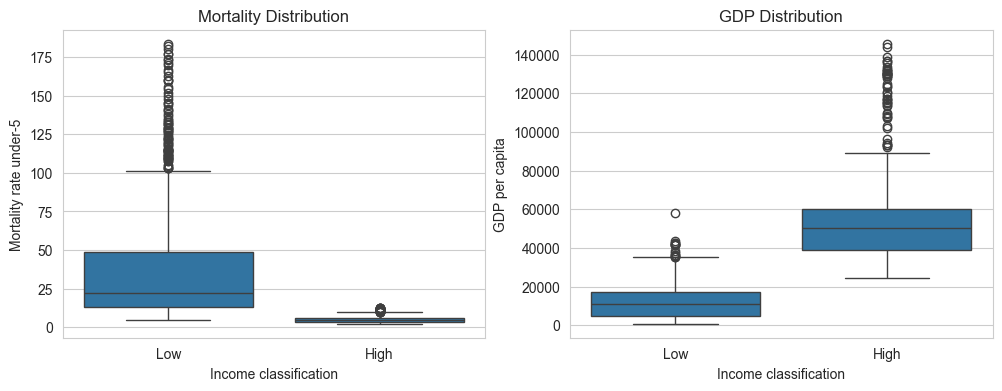

In [91]:
fig, axes = plt.subplots(1,2, figsize=(12,4))
sns.boxplot(data=df_final, x='Income classification', y='Mortality rate under-5', ax=axes[0])
sns.boxplot(data=df_final, x='Income classification', y='GDP per capita', ax=axes[1])
axes[0].set_title("Mortality Distribution")
axes[1].set_title("GDP Distribution")

In [92]:
print(df_final.groupby('Income_High')['Country Name'].nunique())

Income_High
False    54
True     40
Name: Country Name, dtype: int64


In [93]:
# Check if countries change income groups
income_changes = df_final.groupby('Country Name')['Income_High'].nunique()
print("Countries that change income groups:", (income_changes > 1).sum())
print("\nCountries with changes:")
df_final[df_final['Country Name'].isin(income_changes[income_changes > 1].index)][['Country Name', 'Year', 'Income_High']].sort_values(['Country Name', 'Year'])

Countries that change income groups: 14

Countries with changes:


,Country Name,Year,Income_High
374,Bahrain,2000,False
375,Bahrain,2001,True
376,Bahrain,2002,True
377,Bahrain,2003,True
378,Bahrain,2004,True
...,...,...,...
4897,Slovak Republic,2017,True
4898,Slovak Republic,2018,True
4899,Slovak Republic,2019,True
4900,Slovak Republic,2020,True


In [94]:
# Calculate mean GDP per capita by income classification
gdp_means = df_final.groupby('Income_High')['GDP per capita'].mean()

gdp_pc_low = gdp_means[False]   # or gdp_means.loc[False]
gdp_pc_high = gdp_means[True]   # or gdp_means.loc[True]

print(f"Mean GDP per capita (Low-income, 22-year average): ${gdp_pc_low:,.0f}")
print(f"Mean GDP per capita (High-income, 22-year average): ${gdp_pc_high:,.0f}")


Mean GDP per capita (Low-income, 22-year average): $12,024
Mean GDP per capita (High-income, 22-year average): $53,920
